In [32]:
# import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# load the data
data = pd.read_csv('data.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          48620 non-null  int64  
 1   date              48620 non-null  object 
 2   time              48620 non-null  object 
 3   order_details_id  48620 non-null  int64  
 4   pizza_id          48620 non-null  object 
 5   quantity          48620 non-null  int64  
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
 12  day               48620 non-null  object 
 13  hour              48620 non-null  int64  
 14  new_time_again    48620 non-null  object 
 15  year              48620 non-null  int64  
 16  month             48620 non-null  int64 

In [7]:
# display first five rows
data.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,day,hour,new_time_again,year,month
0,1,2015-01-01,2023-03-27 11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Thursday,11,11:38:36,2015,1
1,77,2015-01-02,2023-03-27 12:22:46,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Friday,12,12:22:46,2015,1
2,146,2015-01-03,2023-03-27 14:22:10,357,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Saturday,14,14:22:10,2015,1
3,163,2015-01-03,2023-03-27 16:54:54,389,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Saturday,16,16:54:54,2015,1
4,247,2015-01-04,2023-03-27 20:55:29,568,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Sunday,20,20:55:29,2015,1


In [8]:
data.nunique()

order_id            21350
date                  358
time                16382
order_details_id    48620
pizza_id               91
quantity                4
pizza_type_id          32
size                    5
price                  25
name                   32
category                4
ingredients            32
day                     7
hour                   15
new_time_again      16382
year                    1
month                  12
dtype: int64

In [9]:
# display data types of different all rows 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          48620 non-null  int64  
 1   date              48620 non-null  object 
 2   time              48620 non-null  object 
 3   order_details_id  48620 non-null  int64  
 4   pizza_id          48620 non-null  object 
 5   quantity          48620 non-null  int64  
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
 12  day               48620 non-null  object 
 13  hour              48620 non-null  int64  
 14  new_time_again    48620 non-null  object 
 15  year              48620 non-null  int64  
 16  month             48620 non-null  int64 

## Change the datatype to their correct format

In [10]:
# change category column from object to category
data.category = data.category.astype('category')

In [11]:
# change size from object to category
data['size'] = data['size'].astype('category')

In [12]:
# change column from object to date
data.date = pd.to_datetime(data.date)

In [13]:
# change column time from object to datetime
data.time = pd.to_datetime(data.time)

In [14]:
## sort the data using one column
## data.sort_values(by=["col_name"], inplace = False, ascending = True)

In [15]:
data.dtypes

order_id                     int64
date                datetime64[ns]
time                datetime64[ns]
order_details_id             int64
pizza_id                    object
quantity                     int64
pizza_type_id               object
size                      category
price                      float64
name                        object
category                  category
ingredients                 object
day                         object
hour                         int64
new_time_again              object
year                         int64
month                        int64
dtype: object

In [16]:
data.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,day,hour,new_time_again,year,month
0,1,2015-01-01,2023-03-27 11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Thursday,11,11:38:36,2015,1
1,77,2015-01-02,2023-03-27 12:22:46,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Friday,12,12:22:46,2015,1
2,146,2015-01-03,2023-03-27 14:22:10,357,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Saturday,14,14:22:10,2015,1
3,163,2015-01-03,2023-03-27 16:54:54,389,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Saturday,16,16:54:54,2015,1
4,247,2015-01-04,2023-03-27 20:55:29,568,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Sunday,20,20:55:29,2015,1


# Analysis Questions

## Structure of the dataset
> The dataset contains 48620 rows and 17 columns

## What are the main features of interest in the dataset
* Month
* Type of pizza
* Quantity
* size

What size of Pizza sells more

What are the sales of each month

# The functions below can be reused

In [17]:
# a function used to create pieplots    
def PiePlots(xVar,mtitle):
    sorted_counts = xVar.value_counts();
    plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, autopct='%1.2f%%');
    plt.title(mtitle, fontsize = 15);
    

In [18]:
# a function used to create countplots
def CountPlots(df, xVar):
    base_color = sb.color_palette()[0]
    plt.figure(figsize = [14,8])
    sb.countplot(data = df, x = xVar, edgecolor = 'black', color=base_color);
    plt.title(f'''Distribution of {xVar}'''.title(), fontsize = 14, weight = 'bold')
    plt.xlabel(xVar.title(), fontsize = 10, weight = 'bold')
    plt.ylabel('Frequency'.title(), fontsize = 10, weight = 'bold')

In [19]:
# Total sales
total = data['price'].sum()
print(total)

801944.7


In [20]:
# Total number of pizzas sold
total = data['quantity'].sum()
print(total)

49574


In [21]:
# price per category
data.groupby(["category"])['price'].sum()

category
Chicken    191527.25
Classic    215732.60
Supreme    204486.75
Veggie     190198.10
Name: price, dtype: float64

In [22]:
# price per size
data.groupby(["size"])['price'].sum()

size
L      366862.1
M      245409.5
S      174794.5
XL      13872.0
XXL      1006.6
Name: price, dtype: float64

In [23]:
# total price per month
data.groupby(["month"])['price'].sum()

month
1     68472.70
2     64067.40
3     69198.00
4     67286.20
5     69939.35
6     66796.30
7     71027.45
8     67068.80
9     63018.00
10    62566.50
11    69054.00
12    63450.00
Name: price, dtype: float64

## Univariate Exploration
> In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables.

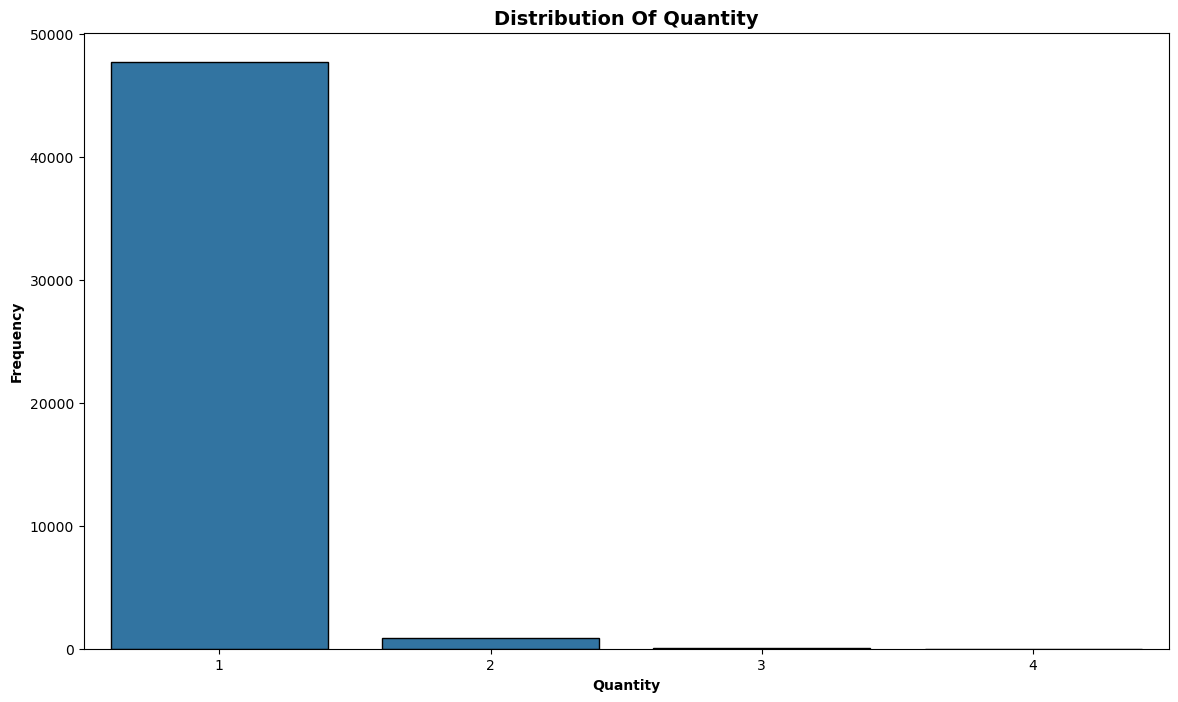

In [24]:
CountPlots(data, 'quantity')

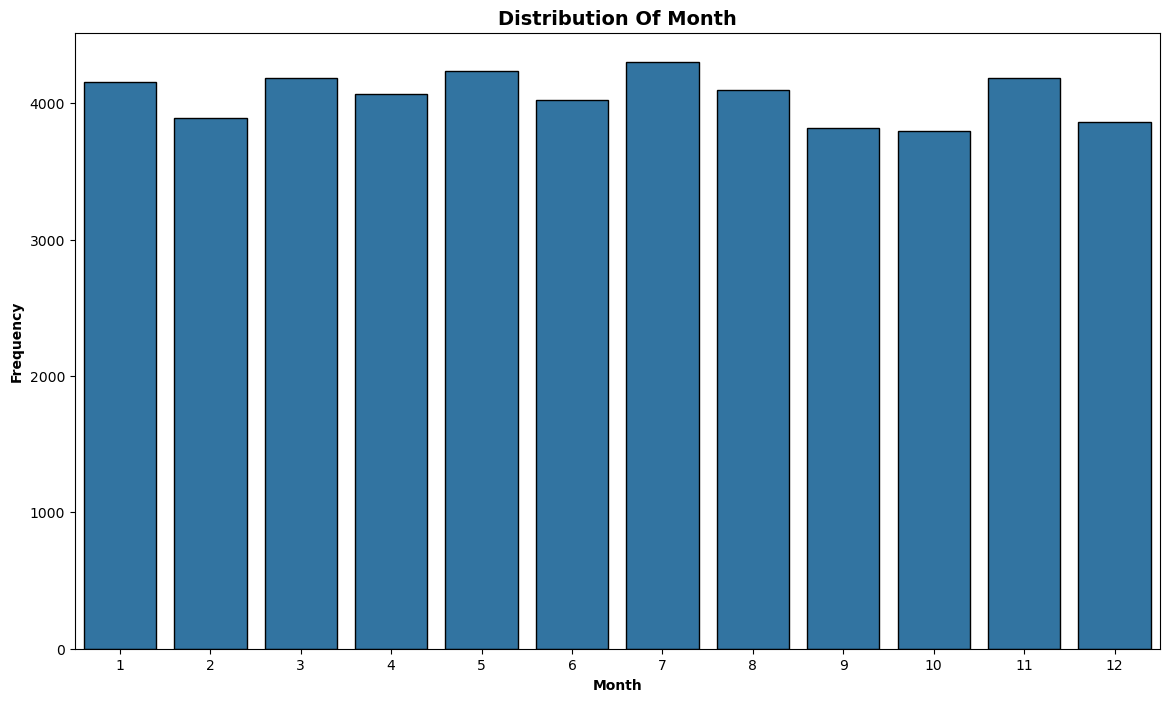

In [25]:
CountPlots(data, 'month')

## Distribution of oders based on different sizes

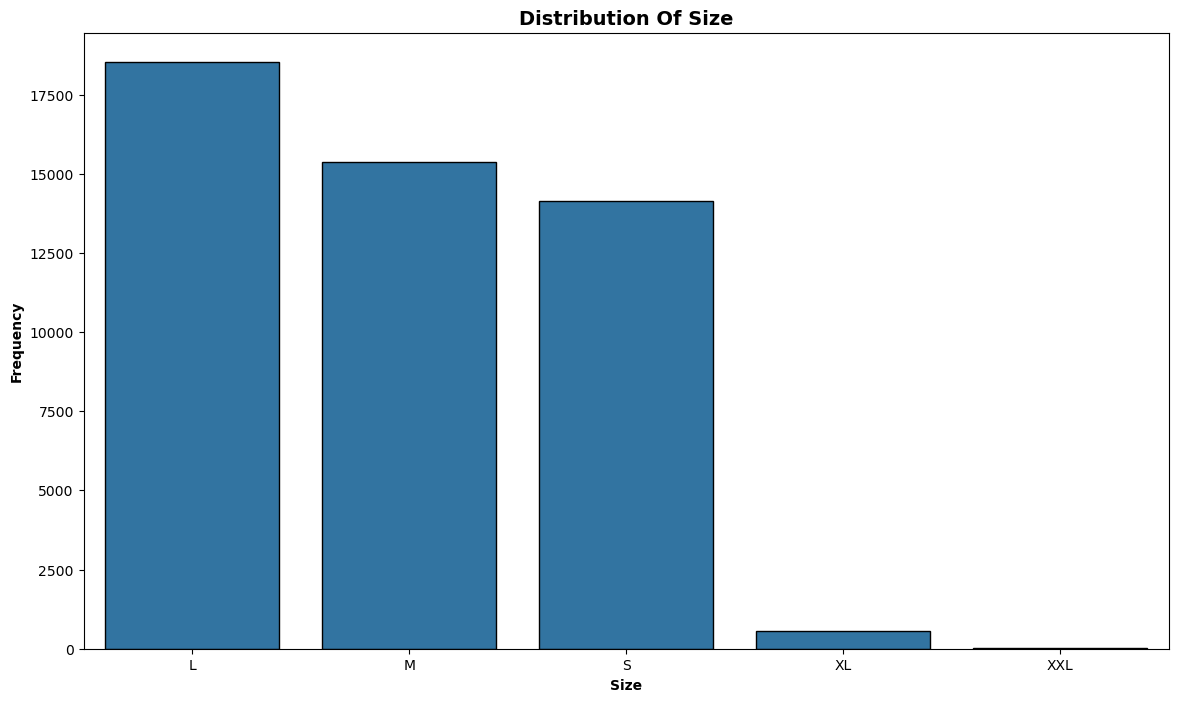

In [26]:
CountPlots(data, 'size')

### The size of pizza ordered by most customers, Large, followed by Medium then small.

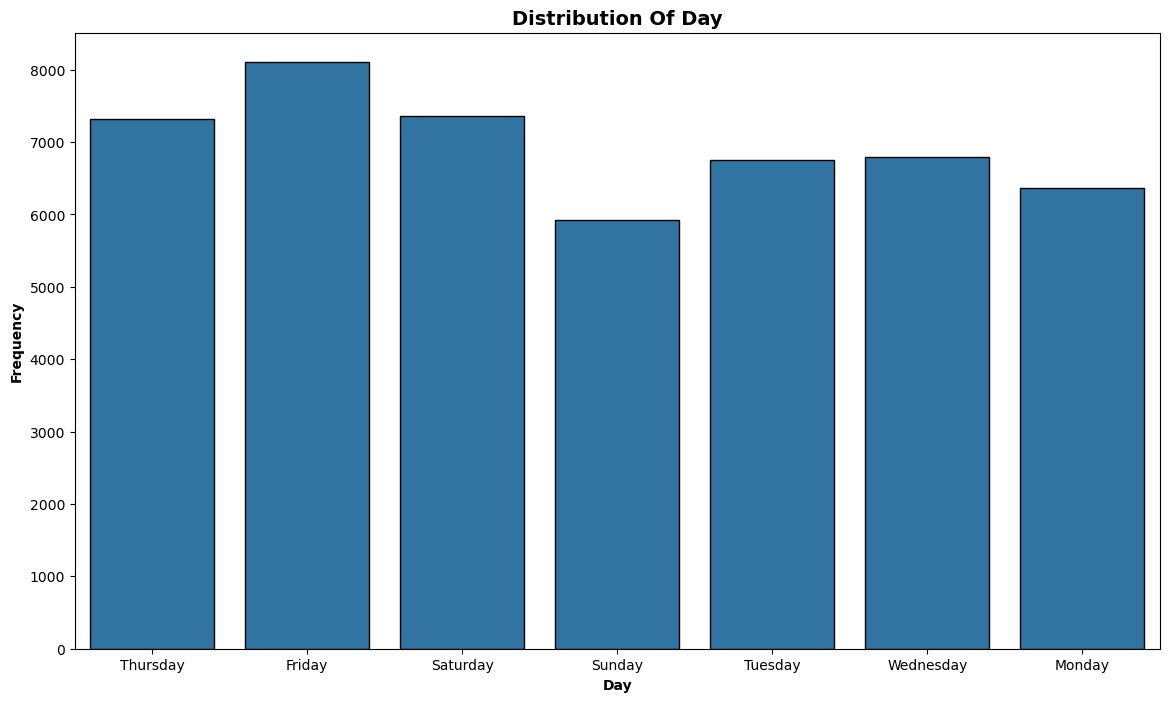

In [27]:
CountPlots(data, 'day')

# Question
## Which category of pizza is more popular

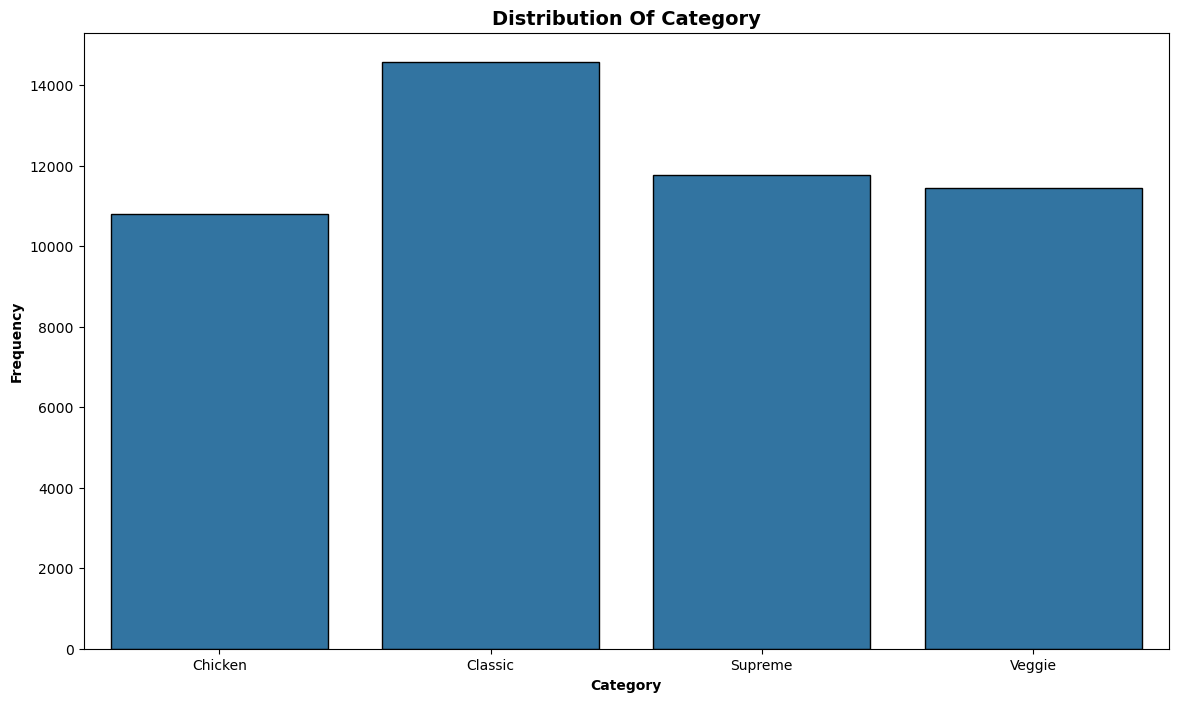

In [29]:
CountPlots(data, 'category');

### From the figure above it is noted that many customers order classic pizza compared to the other three

## Question

### What are the best hours

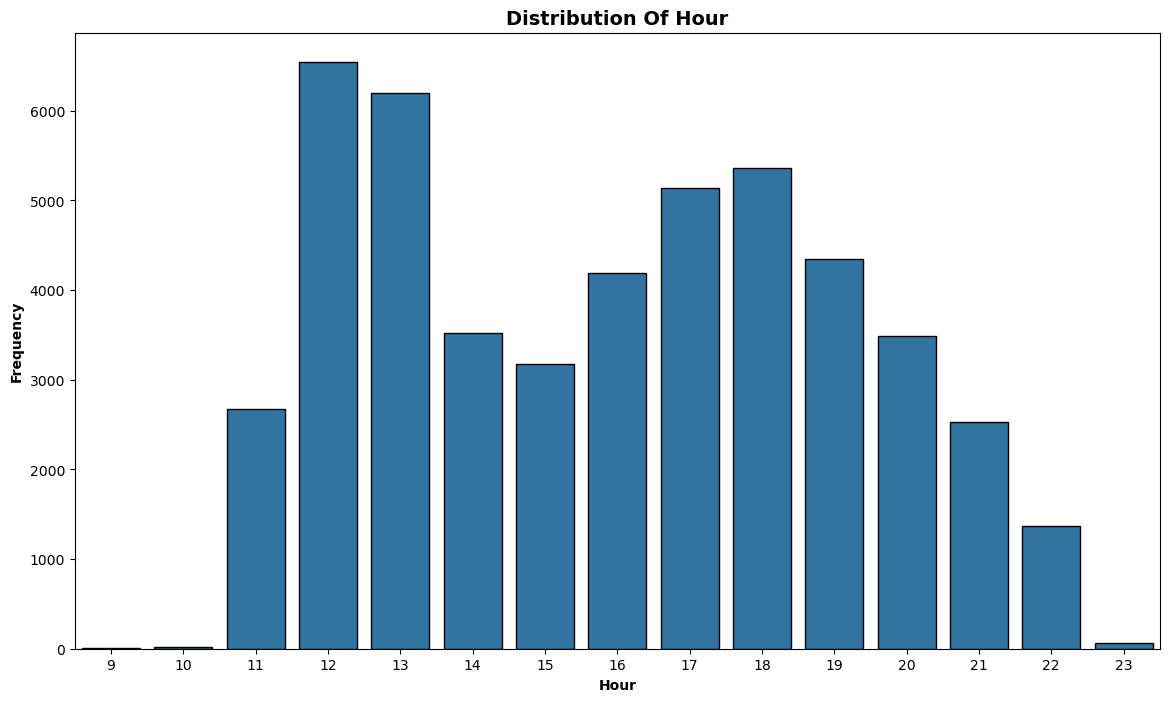

In [30]:
CountPlots(data, 'hour')

### From the chart above the best hours are 12AM, 1PM, 5PM, 18PM

## Bivariate Exploration

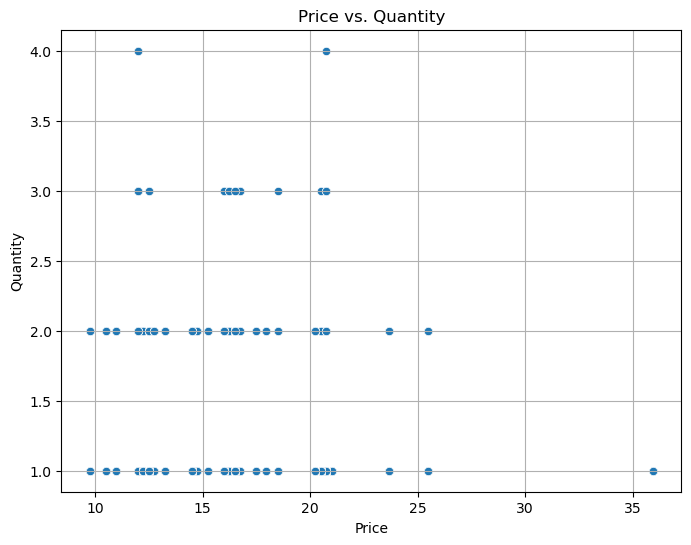

In [38]:
# Bivariate Analysis 1: Price vs. Quantity (Scatter Plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='price', y='quantity')
plt.title('Price vs. Quantity')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.grid()
plt.show()

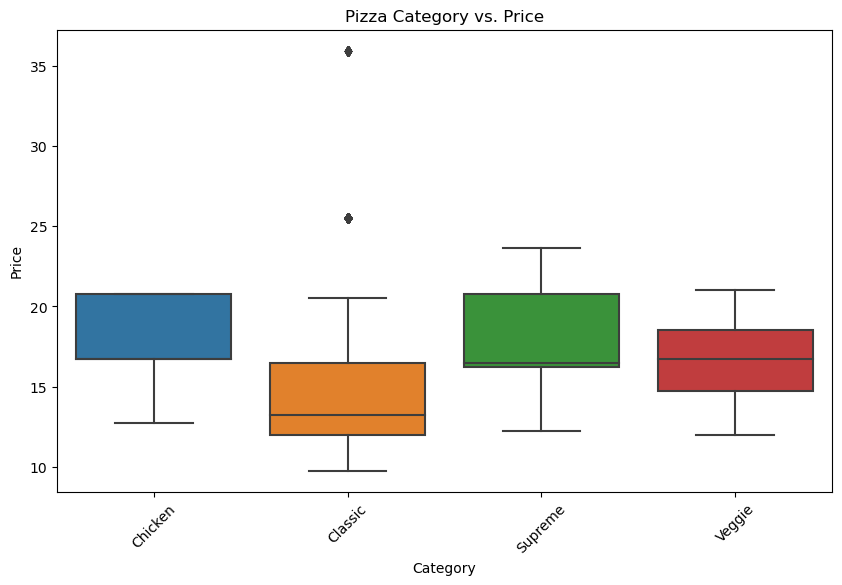

In [34]:
# Bivariate Analysis 2: Pizza Category vs. Price (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='category', y='price')
plt.title('Pizza Category vs. Price')
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

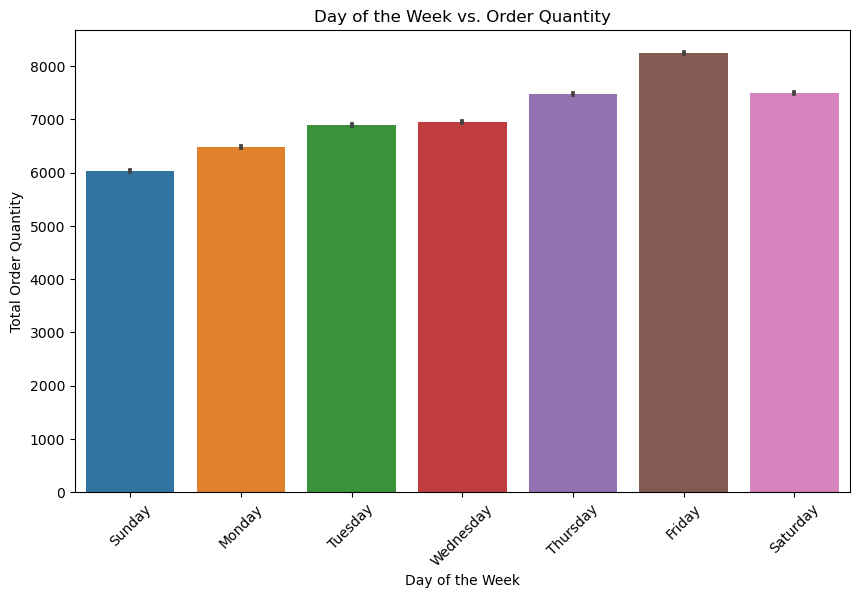

In [43]:
# Define the custom order for the days of the week
custom_day_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

# Bivariate Analysis 3: Day of the Week vs. Order Quantity (Bar Plot)
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='day', y='quantity', estimator=sum, order=custom_day_order)
plt.title('Day of the Week vs. Order Quantity')
plt.xlabel('Day of the Week')
plt.ylabel('Total Order Quantity')
plt.xticks(rotation=45)
plt.show()


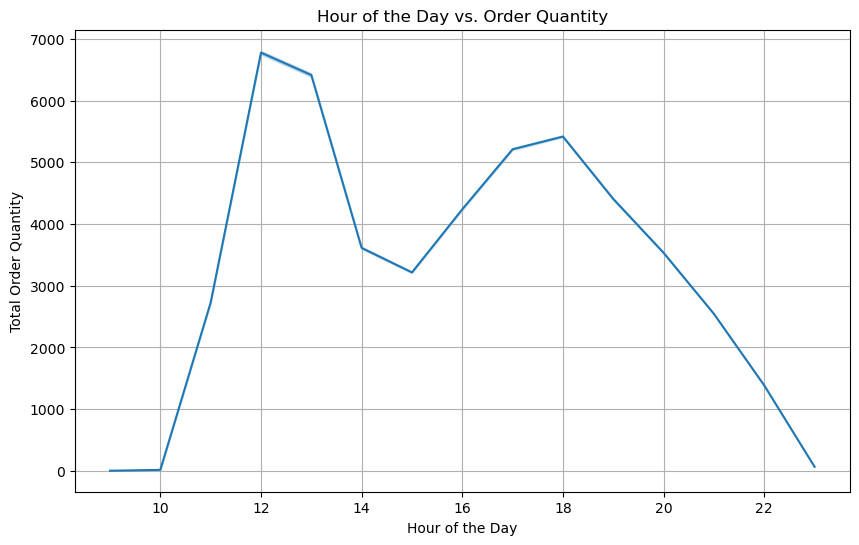

In [37]:
# Bivariate Analysis 4: Hour of the Day vs. Order Quantity (Line Plot)
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='hour', y='quantity', estimator=sum)
plt.title('Hour of the Day vs. Order Quantity')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Order Quantity')
plt.grid()
plt.show()


## Multivariate Exploration